In [ ]:
%%sql


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.metrics import (mean_squared_error,
                             r2_score, mean_absolute_error,
                             mean_absolute_percentage_error)
import math


In [74]:


def plot_ref_pred_series(path, id):
    df_ref = pd.read_csv(path + '/ref_' + str(id) + '.csv', parse_dates=True, index_col='dt')
    df_pred = pd.read_csv(path + '/pred_' + str(id) + '.csv', parse_dates=True, index_col='dt')
        
    #df_ref['7'].plot()
    df_pred.plot()            
    plt.show()
    
    df_ref.plot()
    plt.show()
    
    
def plot_ref_pred_scatter_by_group(path, group_id):
    result_df = pd.read_csv(path + '/result.csv')
    model_ids = result_df[result_df['experiment_group'] == group_id]['model_id'].values.tolist()
    num_cols = len(pd.read_csv(path + '/pred_ref/ref_' + str(model_ids[0]) + '.csv', index_col=0).columns)
    
    
    #create graph with 8 subplots
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(f'Prediction vs Reference for each week for group {group_id} models {model_ids}')
    
    chart_cols = min(num_cols, 4)
    
    for i in range(math.ceil(num_cols/4)):
        for j in range(chart_cols):
            col = i * 4 + j
            
            if col < num_cols:
                for id in model_ids:
                    df_ref = pd.read_csv(path + '/pred_ref/ref_' + str(id) + '.csv', index_col=0)
                    df_pred = pd.read_csv(path + '/pred_ref/pred_' + str(id) + '.csv', index_col=0)
                    axs[i, j].scatter(df_ref[str(col)], df_pred[str(col)])
            
                axs[i, j].set_xlabel('Reference')
                axs[i, j].set_ylabel('Prediction')
                axs[i, j].set_title(f'Week {col + 1}')
            
    plt.show()
    #for col in df_ref.columns:
      #  plt.scatter(df_ref[col], df_pred[col])
       # plt.xlabel('Reference')
       # plt.ylabel('Prediction')
      #  plt.title(f'Week {int(col) + 1}')
       # plt.show()


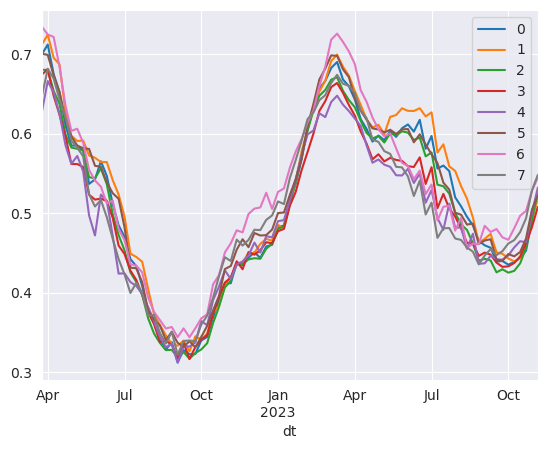

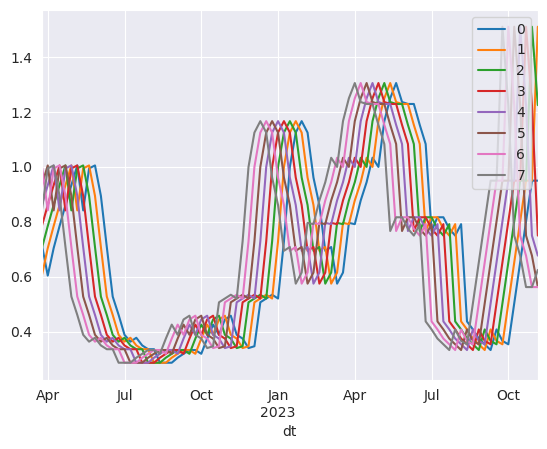

In [75]:
plot_ref_pred_series('../../experiments/exp_test_2025-06-01/pred_ref', 553)

In [76]:
in_df = pd.read_csv('../../processed_data/price_weather_weekly_df.V0.csv')
in_df

,dt,Alface Americana - Roça,Alface Crespa - Roça,Alface Lisa - Roça,Alface Americana - Atacado,Alface Crespa - Atacado,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_mean","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_max","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_sum","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)_mean",...,Alface Crespa - Roça_-8,Alface Crespa - Roça_-9,Alface Crespa - Roça_-10,Alface Crespa - Roça_-11,Alface Crespa - Roça_-12,Alface Crespa - Roça_+49,Alface Crespa - Roça_+50,Alface Crespa - Roça_+51,Alface Crespa - Roça_+52,Alface Crespa - Roça_+53
0,2017-04-30 00:00:00+00:00,0.849167,0.513889,0.550000,NaN,NaN,0.391667,12.0,65.8,909.321429,...,0.534306,0.489861,0.447639,0.402778,0.408750,0.444444,0.430556,0.437778,0.426111,0.616500
1,2017-05-07 00:00:00+00:00,0.781667,0.541667,0.513889,NaN,NaN,0.070238,8.4,11.8,909.821429,...,0.489861,0.447639,0.402778,0.408750,0.417500,0.453889,0.444444,0.430556,0.437778,0.426111
2,2017-05-14 00:00:00+00:00,0.725000,0.467778,0.444444,NaN,NaN,0.108333,4.6,18.2,907.244048,...,0.447639,0.402778,0.408750,0.417500,0.411944,0.354444,0.453889,0.444444,0.430556,0.437778
3,2017-05-21 00:00:00+00:00,0.698333,0.375000,0.437778,NaN,NaN,0.302381,7.2,50.8,907.041071,...,0.402778,0.408750,0.417500,0.411944,0.389722,0.315000,0.354444,0.453889,0.444444,0.430556
4,2017-05-28 00:00:00+00:00,0.666667,0.322222,0.322222,NaN,NaN,0.153571,7.4,25.8,910.460714,...,0.408750,0.417500,0.411944,0.389722,0.360556,0.777778,0.315000,0.354444,0.453889,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2023-12-03 00:00:00+00:00,1.875000,0.750000,0.750000,1.0,0.5,0.077381,5.2,13.0,905.600595,...,NaN,NaN,NaN,NaN,NaN,0.520833,0.507083,0.347083,0.340417,0.375000
345,2023-12-10 00:00:00+00:00,1.458333,0.677083,0.677083,1.0,0.5,0.697619,28.2,117.2,906.600000,...,NaN,NaN,NaN,NaN,NaN,0.534583,0.520833,0.507083,0.347083,0.340417
346,2023-12-17 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,0.347619,28.2,58.4,906.604464,...,NaN,NaN,NaN,NaN,NaN,0.520833,0.534583,0.520833,0.507083,0.347083
347,2023-12-24 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,0.147619,7.4,24.8,904.365476,...,NaN,NaN,NaN,NaN,NaN,0.729167,0.520833,0.534583,0.520833,0.507083
